In [2]:
import numpy as np
import itertools 
import ezc3d
import matplotlib.pyplot as plt
from pathlib import Path
from math import sqrt
from tqdm import tqdm

# Wczytywanie danych

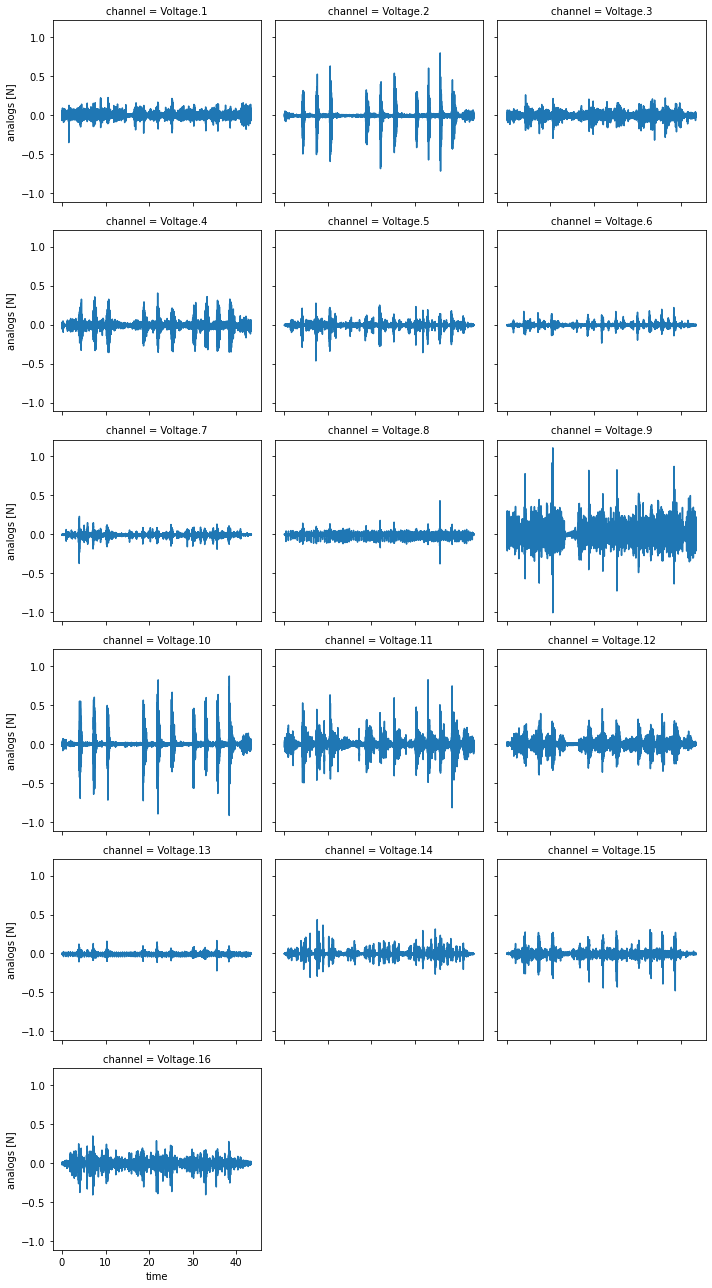

In [16]:
from pyomeca import Analogs
#from pyomeca import Markers

data_path = r"C:\Users\gmultimedia.PJATK17\Desktop\PjatkM\2020-08-05-B0444-S01-E01-T01.c3d"
#markers = Markers.from_c3d(data_path, prefix_delimiter=":")
muscles = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]
muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]


emg = Analogs.from_c3d(data_path, usecols=muscles)
emg.plot(x="time", col="channel", col_wrap=3)

# Przetwarzanie wykresów

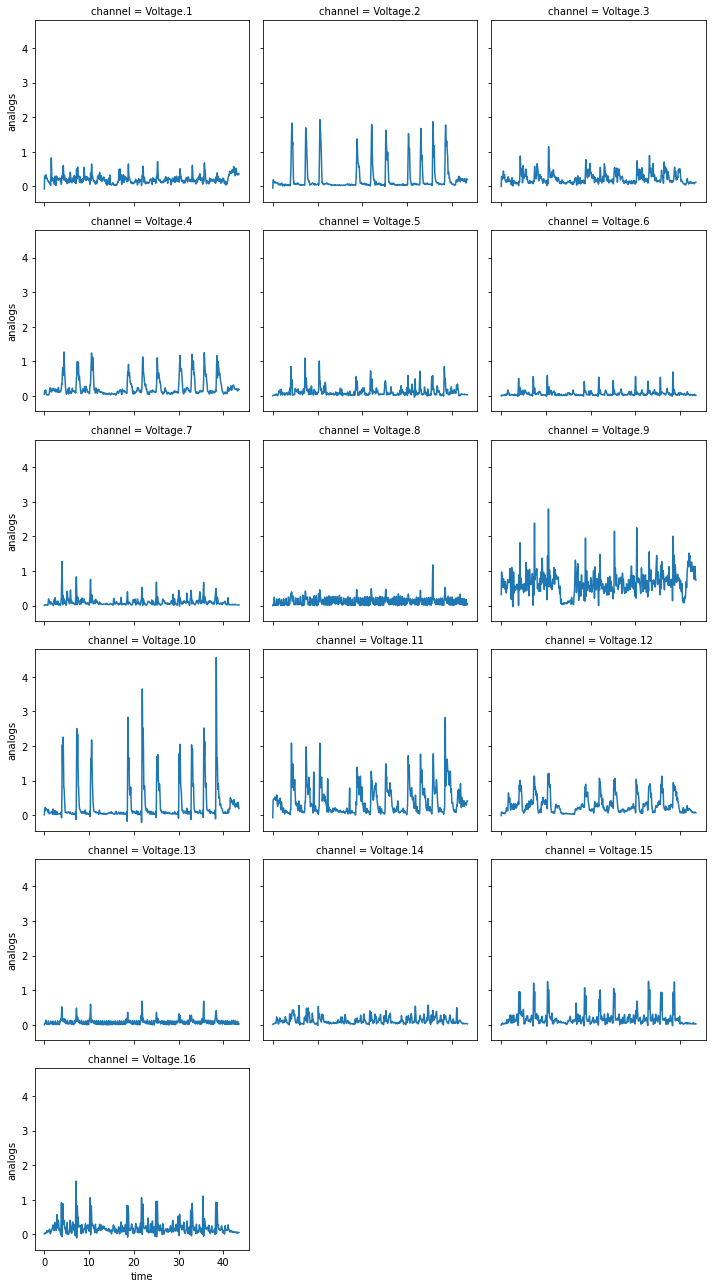

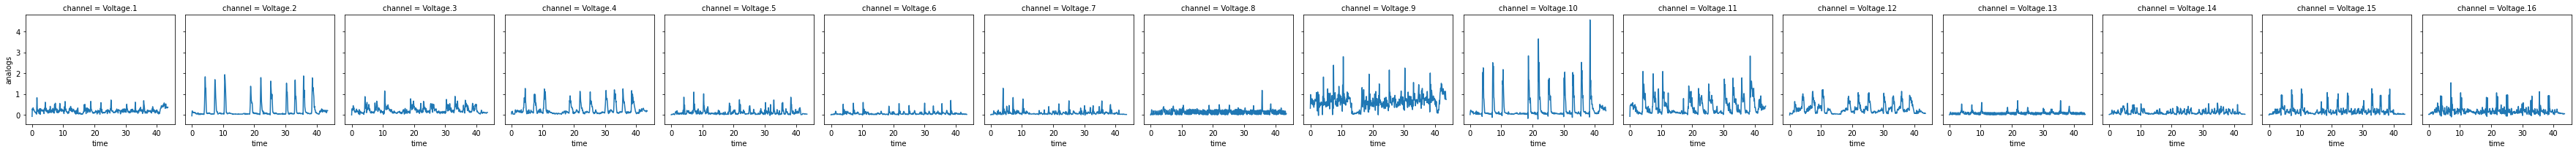

In [4]:
emg_processed = (
    emg.meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize(8)
)

emg_processed.plot(x="time", col="channel", col_wrap=3)

emg_processed.plot(col="channel")

# Podpisanie wykresów

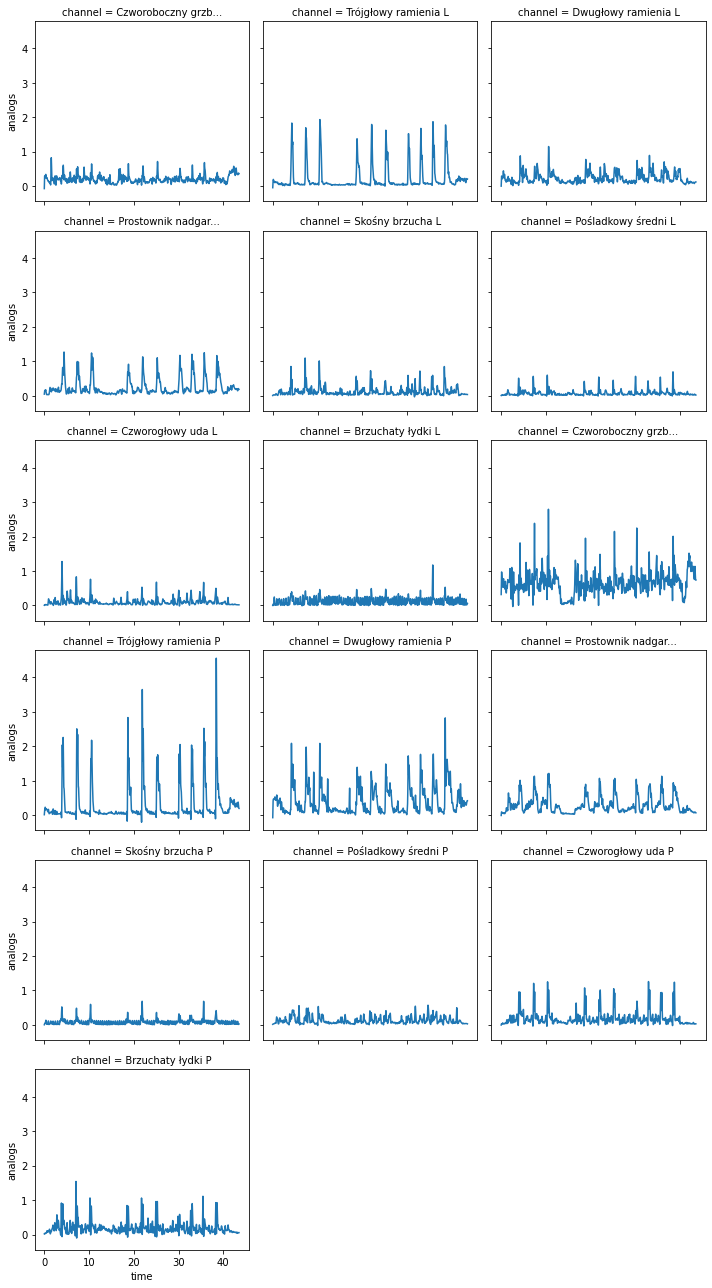

In [5]:
#emg_processed[0].plot()

emg_processed.indexes
emg_processed['channel'] = muscles_names
emg_processed.plot(x="time", col="channel", col_wrap=3)

# Funkcja odczytująca eventy

In [6]:
from ezc3d import c3d
import numpy as np

def read_labels(data_path):
    c3d_to_compare= c3d(data_path)
    event = c3d_to_compare['parameters']['EVENT']['LABELS']['value']
    time = np.around(c3d_to_compare['parameters']['EVENT']['TIMES']['value'][1]*200)
    
    return [event, time]

In [7]:
read_labels(data_path)

[['Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike'],
 array([ 664., 1320., 1960., 2508., 3480., 4269., 4975., 5490., 5964.,
        6462., 7077., 7609.,  921., 1553., 2217., 3845., 4543., 5249.,
        6172., 6670., 7251.])]

In [8]:
import data_procesing as dp
import numpy as np
import importlib

In [9]:
importlib.reload(dp)
data_path = r"C:\Users\gmultimedia.PJATK17\Desktop\PjatkM\2020-08-05-B0444-S01-E01-T01.c3d"
eventy = dp.read_labels(data_path)
print(eventy[1])

print(eventy[0][15])
print(eventy[0][:])
eventy[0].index('Foot Strike')


indxE = [i for i, x in enumerate(eventy[0]) if x == "Event"]
print(indxE)
indxFS = [i for i, x in enumerate(eventy[0]) if x == "Foot Strike"]
print(indxFS)

CzasFS = np.zeros(len(indxFS))
for i in range(len(indxFS)):
    print(indxFS[i])
    CzasFS[i] = eventy[1][indxFS[i]]
print('Czasy Foot Strikeów',CzasFS)

CzasE = np.zeros(len(indxE))
for i in range(len(indxE)):
    print(indxE[i])
    CzasE[i] = eventy[1][indxE[i]]
print('Czasy Eventów:',CzasE)
print(eventy[1])
eventy[1].sort()
print(eventy[1])

[ 664. 1320. 1960. 2508. 3480. 4269. 4975. 5490. 5964. 6462. 7077. 7609.
  921. 1553. 2217. 3845. 4543. 5249. 6172. 6670. 7251.]
Foot Strike
['Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[12, 13, 14, 15, 16, 17, 18, 19, 20]
12
13
14
15
16
17
18
19
20
Czasy Foot Strikeów [ 921. 1553. 2217. 3845. 4543. 5249. 6172. 6670. 7251.]
0
1
2
3
4
5
6
7
8
9
10
11
Czasy Eventów: [ 664. 1320. 1960. 2508. 3480. 4269. 4975. 5490. 5964. 6462. 7077. 7609.]
[ 664. 1320. 1960. 2508. 3480. 4269. 4975. 5490. 5964. 6462. 7077. 7609.
  921. 1553. 2217. 3845. 4543. 5249. 6172. 6670. 7251.]
[ 664.  921. 1320. 1553. 1960. 2217. 2508. 3480. 3845. 4269. 4543. 4975.
 5249. 5490. 5964. 6172. 6462. 6670. 7077. 7251. 7609.]


In [21]:
p=np.zeros(20)
d=np.zeros(20)
j=0
for i in range(len(eventy[1])):
    if not i == len(eventy[1])-1:
        pierwszy = eventy[1][i]
        drugi = eventy[1][i+1]
        #print('pierwszy', pierwszy)
        #print('drugi', drugi)
        #print('CZASY E',CzasE)
        if pierwszy in CzasE:
            if drugi in CzasFS:
                
                p[j]=pierwszy
                d[j]=drugi
                print('Początek ruchu', pierwszy, 'Koniec ruchu', drugi)
                j+=1
p=p.astype(int)
d=d.astype(int)

Początek ruchu 664.0 Koniec ruchu 921.0
Początek ruchu 1320.0 Koniec ruchu 1553.0
Początek ruchu 1960.0 Koniec ruchu 2217.0
Początek ruchu 3480.0 Koniec ruchu 3845.0
Początek ruchu 4269.0 Koniec ruchu 4543.0
Początek ruchu 4975.0 Koniec ruchu 5249.0
Początek ruchu 5964.0 Koniec ruchu 6172.0
Początek ruchu 6462.0 Koniec ruchu 6670.0
Początek ruchu 7077.0 Koniec ruchu 7251.0


[ 664 1320 1960 3480 4269 4975 5964 6462 7077    0    0    0    0    0
    0    0    0    0    0    0]


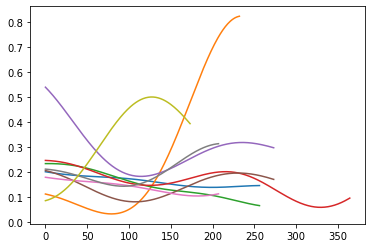

In [40]:
print(p)
for i in range(10):
         plt.plot(emg_processed[0][p[i]:d[i]])